In [ ]:
# Ashutosh Chauhan: S20180010017
# Ayush Gairola: S20180010020
# Pradum Singh: S20180010136
# Vipul Rawat: S20180010192

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('drive/MyDrive/Assignment1/assignment1-part1')

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from data_process import get_CIFAR10_data, get_MUSHROOM_data
from scipy.spatial import distance
from models import SVM, Softmax
%matplotlib inline

# Loading CIFAR-10

In the following cells we determine the number of images for each split and load the images.
<br /> 
TRAIN_IMAGES + VAL_IMAGES = (0, 50000]
, TEST_IMAGES = 10000

In [ ]:
# You can change these numbers for experimentation
# For submission we will use the default values 
TRAIN_IMAGES = 40000
VAL_IMAGES = 10000

In [ ]:
data = get_CIFAR10_data(TRAIN_IMAGES, VAL_IMAGES)
X_train_CIFAR, y_train_CIFAR = data['X_train'], data['y_train']
X_val_CIFAR, y_val_CIFAR = data['X_val'], data['y_val']
X_test_CIFAR, y_test_CIFAR = data['X_test'], data['y_test']
n_class_CIFAR = len(np.unique(y_test_CIFAR))

Convert the sets of images from dimensions of **(N, 3, 32, 32) -> (N, 3072)** where N is the number of images so that each **3x32x32** image is represented by a single vector.

In [ ]:
X_train_CIFAR = np.reshape(X_train_CIFAR, (X_train_CIFAR.shape[0], -1))
X_val_CIFAR = np.reshape(X_val_CIFAR, (X_val_CIFAR.shape[0], -1))
X_test_CIFAR = np.reshape(X_test_CIFAR, (X_test_CIFAR.shape[0], -1))

In [ ]:
print(X_train_CIFAR.shape)
print(X_val_CIFAR.shape)
print(X_test_CIFAR.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


[ 8.30510771e-14  1.09847065e-13  1.12379439e-14 -2.38776465e-13
  1.67116809e-13  2.56787303e-13  2.98291525e-13  2.69926659e-13
 -2.05518802e-13  2.91075253e-13]


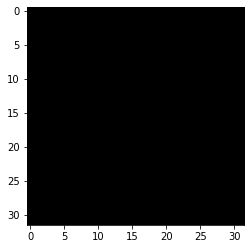

(40000, 3073) (10000, 3073) (10000, 3073)


In [ ]:
mean_image = np.mean(X_train_CIFAR, axis=0)
print(mean_image[:10]) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()

X_train_CIFAR -= mean_image
X_val_CIFAR -= mean_image
X_test_CIFAR -= mean_image

X_train_CIFAR = np.hstack([X_train_CIFAR, np.ones((X_train_CIFAR.shape[0], 1))])
X_val_CIFAR = np.hstack([X_val_CIFAR, np.ones((X_val_CIFAR.shape[0], 1))])
X_test_CIFAR = np.hstack([X_test_CIFAR, np.ones((X_test_CIFAR.shape[0], 1))])
print(X_train_CIFAR.shape, X_val_CIFAR.shape, X_test_CIFAR.shape)

# Loading Mushroom

In the following cells we determine the splitting of the mushroom dataset.
<br /> TRAINING + VALIDATION = 0.8, TESTING = 0.2

In [5]:
# TRAINING = 0.6 indicates 60% of the data is used as the training dataset.
VALIDATION = 0.2

In [6]:
data = get_MUSHROOM_data(VALIDATION)
X_train_MR, y_train_MR = data['X_train'], data['y_train']
X_val_MR, y_val_MR = data['X_val'], data['y_val']
X_test_MR, y_test_MR = data['X_test'], data['y_test']
n_class_MR = len(np.unique(y_test_MR))

print("Number of train samples: ", X_train_MR.shape[0])
print("Number of val samples: ", X_val_MR.shape[0])
print("Number of test samples: ", X_test_MR.shape[0])

Number of train samples:  4874
Number of val samples:  1625
Number of test samples:  1625


### Get Accuracy

This function computes how well your model performs using accuracy as a metric.

In [7]:
def get_acc(pred, y_test):
    return np.sum(y_test==pred)/len(y_test)*100

# Support Vector Machines (with SGD)

First, you will implement a "soft margin" SVM. In this formulation you will maximize the margin between positive and negative training examples and penalize margin violations using a hinge loss.

We will optimize the SVM loss using SGD. This means you must compute the loss function with respect to model weights. You will use this gradient to update the model weights.

SVM optimized with SGD has 3 hyperparameters that you can experiment with :
- **Learning rate** - similar to as defined above in Perceptron, this parameter scales by how much the weights are changed according to the calculated gradient update. 
- **Epochs** - similar to as defined above in Perceptron.
- **Regularization constant** - Hyperparameter to determine the strength of regularization. In this case it is a coefficient on the term which maximizes the margin. You could try different values. The default value is set to 0.05.

You will implement the SVM using SGD in the **models/SVM.py**

The following code: 
- Creates an instance of the SVM classifier class 
- The train function of the SVM class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

## Train SVM on CIFAR

In [ ]:
lr = 1e-7
n_epochs = 1500
reg_const = 2500

svm_CIFAR = SVM(n_class_CIFAR, lr, n_epochs, reg_const)
svm_CIFAR.train(X_train_CIFAR, y_train_CIFAR)


Loss in epoch 100 is 78.00766095201206

Loss in epoch 200 is 69.29955610802395

Loss in epoch 300 is 62.19514655011093

Loss in epoch 400 is 57.49116950836641

Loss in epoch 500 is 51.65905599202009

Loss in epoch 600 is 47.00985451641452

Loss in epoch 700 is 42.33829235204168

Loss in epoch 800 is 39.26063563994178

Loss in epoch 900 is 34.971685497906726

Loss in epoch 1000 is 32.24164666354588

Loss in epoch 1100 is 29.518671727521195

Loss in epoch 1200 is 27.085877101220863

Loss in epoch 1300 is 24.422805573559074

Loss in epoch 1400 is 23.317521927646375

Loss in epoch 1500 is 20.665043663639512
[[ 5.23984733e-04  6.77010271e-04  5.23751864e-04 ...  3.34771024e-04
   9.64654947e-04  2.87533700e-04]
 [ 1.91331552e-04 -7.99722649e-04 -8.25420907e-05 ...  1.85988996e-04
  -8.47168777e-04  7.42309627e-04]
 [-2.44823718e-04 -4.78669703e-04  8.04938791e-04 ...  5.26562884e-04
  -2.11596355e-04  9.05222786e-04]
 ...
 [-4.23665395e-05 -1.99063520e-04 -2.64348050e-04 ...  4.68461470e-0

In [ ]:
pred_svm = svm_CIFAR.predict(X_train_CIFAR)
print('The training accuracy is given by: %f' % (get_acc(pred_svm, y_train_CIFAR)))

The training accuracy is given by: 32.282500


### Validate SVM on CIFAR

In [ ]:
pred_svm = svm_CIFAR.predict(X_val_CIFAR)
print('The validation accuracy is given by: %f' % (get_acc(pred_svm, y_val_CIFAR)))

The validation accuracy is given by: 31.390000


### Test SVM on CIFAR

In [ ]:
pred_svm = svm_CIFAR.predict(X_test_CIFAR)
print('The testing accuracy is given by: %f' % (get_acc(pred_svm, y_test_CIFAR)))

The testing accuracy is given by: 31.040000


## Train SVM on Mushroom

In [13]:
lr = 1e-2
n_epochs = 2000
reg_const = 0

svm_MR = SVM(n_class_MR, lr, n_epochs, reg_const)
svm_MR.train(X_train_MR, y_train_MR)


Loss in epoch 100 is 0.3899582088680478

Loss in epoch 200 is 0.3819506677418025

Loss in epoch 300 is 0.2998088522772014

Loss in epoch 400 is 0.25841367991195513

Loss in epoch 500 is 0.2422558529497003

Loss in epoch 600 is 0.26056106253468525

Loss in epoch 700 is 0.29247706521963013

Loss in epoch 800 is 0.34033574070134476

Loss in epoch 900 is 0.23230559916658564

Loss in epoch 1000 is 0.18563473356435467

Loss in epoch 1100 is 0.18643854683357375

Loss in epoch 1200 is 0.1443342487817523

Loss in epoch 1300 is 0.2615038595151674

Loss in epoch 1400 is 0.18939824232331148

Loss in epoch 1500 is 0.23782115497390066

Loss in epoch 1600 is 0.30003553101732905

Loss in epoch 1700 is 0.19637939832306345

Loss in epoch 1800 is 0.22702981334515557

Loss in epoch 1900 is 0.1913894423852743

Loss in epoch 2000 is 0.16376614608096987
[[-4.39157541e+00 -4.37474783e+00]
 [-2.13112164e+00 -2.02562552e+00]
 [-5.85807130e+00 -5.86625793e+00]
 [-3.70414297e-01 -9.05815874e-01]
 [-4.46737249e+0

In [14]:
pred_svm = svm_MR.predict(X_train_MR)
print('The training accuracy is given by: %f' % (get_acc(pred_svm, y_train_MR)))

The training accuracy is given by: 93.393517


### Validate SVM on Mushroom

In [15]:
pred_svm = svm_MR.predict(X_val_MR)
print('The validation accuracy is given by: %f' % (get_acc(pred_svm, y_val_MR)))

The validation accuracy is given by: 92.861538


## Test SVM on Mushroom

In [16]:
pred_svm = svm_MR.predict(X_test_MR)
print('The testing accuracy is given by: %f' % (get_acc(pred_svm, y_test_MR)))

The testing accuracy is given by: 92.861538


# Softmax Classifier (with SGD)

Next, you will train a Softmax classifier. This classifier consists of a linear function of the input data followed by a softmax function which outputs a vector of dimension C (number of classes) for each data point. Each entry of the softmax output vector corresponds to a confidence in one of the C classes, and like a probability distribution, the entries of the output vector sum to 1. We use a cross-entropy loss on this sotmax output to train the model. 

Check the following link as an additional resource on softmax classification: http://cs231n.github.io/linear-classify/#softmax

Once again we will train the classifier with SGD. This means you need to compute the gradients of the softmax cross-entropy loss function according to the weights and update the weights using this gradient. Check the following link to help with implementing the gradient updates: https://deepnotes.io/softmax-crossentropy

The softmax classifier has 3 hyperparameters that you can experiment with :
- **Learning rate** - As above, this controls how much the model weights are updated with respect to their gradient.
- **Number of Epochs** - As described for perceptron.
- **Regularization constant** - Hyperparameter to determine the strength of regularization. In this case, we minimize the L2 norm of the model weights as regularization, so the regularization constant is a coefficient on the L2 norm in the combined cross-entropy and regularization objective.

You will implement a softmax classifier using SGD in the **models/Softmax.py**

The following code: 
- Creates an instance of the Softmax classifier class 
- The train function of the Softmax class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

## Train Softmax on CIFAR

In [ ]:
lr = 1e-6
n_epochs = 1500
reg_const = 1000

softmax_CIFAR = Softmax(n_class_CIFAR, lr, n_epochs, reg_const)
softmax_CIFAR.train(X_train_CIFAR, y_train_CIFAR)


Loss in epoch 100 is 2.110634165735894

Loss in epoch 200 is 1.8616286132759536

Loss in epoch 300 is 1.9629903024534288

Loss in epoch 400 is 1.901772716518024

Loss in epoch 500 is 1.8708154949698148

Loss in epoch 600 is 1.8326680930198265

Loss in epoch 700 is 1.8381842500743135

Loss in epoch 800 is 1.7228166801728266

Loss in epoch 900 is 1.8964555165847856

Loss in epoch 1000 is 1.7633436699605962

Loss in epoch 1100 is 1.9030973422602069

Loss in epoch 1200 is 1.7382999276854239

Loss in epoch 1300 is 1.9555039196777435

Loss in epoch 1400 is 1.7788266209948365

Loss in epoch 1500 is 1.716449367910575
[[-3.02037731e-06  2.13944658e-05  2.59698910e-07 ... -5.40647915e-06
   6.05348144e-05  6.83565630e-06]
 [-2.62616956e-05  3.11327171e-05  1.43256343e-05 ... -2.09922321e-05
   4.72533116e-05 -1.15478823e-05]
 [-3.62872900e-05  4.30626001e-05  2.90211246e-05 ... -2.63540025e-05
   3.62064490e-05 -2.13020406e-05]
 ...
 [-4.84076299e-05  5.97045717e-05 -5.64837206e-05 ... -1.12223

In [ ]:
pred_softmax = softmax_CIFAR.predict(X_train_CIFAR)
print('The training accuracy is given by: %f' % (get_acc(pred_softmax, y_train_CIFAR)))

The training accuracy is given by: 40.277500


### Validate Softmax on CIFAR

In [ ]:
pred_softmax = softmax_CIFAR.predict(X_val_CIFAR)
print('The validation accuracy is given by: %f' % (get_acc(pred_softmax, y_val_CIFAR)))

The validation accuracy is given by: 38.690000


### Testing Softmax on CIFAR

In [ ]:
pred_softmax = softmax_CIFAR.predict(X_test_CIFAR)
print('The testing accuracy is given by: %f' % (get_acc(pred_softmax, y_test_CIFAR)))

The testing accuracy is given by: 39.020000


## Train Softmax on Mushroom

In [ ]:
lr = 1e-2
n_epochs = 9500
reg_const = 0

softmax_MR = Softmax(n_class_MR, lr, n_epochs, reg_const)
softmax_MR.train(X_train_MR, y_train_MR)

In [26]:
pred_softmax = softmax_MR.predict(X_train_MR)
print('The training accuracy is given by: %f' % (get_acc(pred_softmax, y_train_MR)))

The training accuracy is given by: 93.803857


### Validate Softmax on Mushroom

In [27]:
pred_softmax = softmax_MR.predict(X_val_MR)
print('The validation accuracy is given by: %f' % (get_acc(pred_softmax, y_val_MR)))

The validation accuracy is given by: 93.107692


### Testing Softmax on Mushroom

In [28]:
pred_softmax = softmax_MR.predict(X_test_MR)
print('The testing accuracy is given by: %f' % (get_acc(pred_softmax, y_test_MR)))

The testing accuracy is given by: 93.230769
